# Oh hey

This homework is just coding. We will be working with a simple example from OpenAI gym called "Frozen Lake". It is a text-based maze environment that your controller will learn to navigate. It is slippery, however, so sometimes you don't always move where you try to go.

In [1]:
import gym
import numpy as np
import numpy.random as rnd
import matplotlib.pyplot as plt

%matplotlib inline
env=gym.make('FrozenLake-v0')
env.render()


SFFF
FHFH
FFFH
HFFG


The board can be interpretted as follows
* S - Start State
* F - Frozen parts
* H - Holes
* G - Goal

The episode ends if you hit a hole or the goal state. You recieve a reward of $1$ if you reach the goal and a reward of $0$ otherwise.

In [2]:
s = env.reset()

done = False
R = []
while not done:
    a = env.action_space.sample()
        
    s, r, done, info = env.step(a)
    R.append(r)

    
env.render()
print(R)

  (Up)
SFFF
FHFH
FFFH
HFFG
[0.0, 0.0]


# Question

Use on-policy Monte Carlo control to learn a policy for this problem. (See 5.4 of the book.) Simulate $100,000$ episodes. Let $G^i$ be the total reward for episode $i$. 

Make a plot of $\frac{1}{i}\sum_{j=1}^i G^j$ (the running average of the rewards), for $i=1$ to $100,000$. Try to get it to learn well, but don't spend forever tuning parameters. Go outside. Treat yourself. 

Here are some tips about the learning process.

* With well-tuned controller, average rewards of around 0.7 are possible. (That is, it is solved 70% of the time) 
* With the basic Monte Carlo controller, you probably won't get very close to that after $100,000$ steps. (Average rewards between 0.2 and 0.4 would be more likely.)
* The main free parameter in the Monte Carlo algorithm is $\epsilon$, which is the probability that you choose the action completely at random. Typically $\epsilon$ must start fairly large, to promote exploration, and then decrease as more data has been collected. A reasonble tuning rule takes the form $\epsilon_i = i^{-\beta}$ on episode $i$, where $\beta\in (0,1)$. You may need to play around with this to get good results. 
* The performance of the learning algorithm can vary from trial to trial due to randomness.
* If an episode is taking a long time, the environment will time out. When that happens, the `info` dictionary will have an entry with key 'TimeLimit.truncated'. This is not a big deal for the Monte Carlo method. It will be important when we start doing policy iteration on the estimated model.

In [3]:
# Make your simulation here

1000 0.055
2000 0.064
3000 0.08733333333333333
4000 0.10425
5000 0.1162
6000 0.12566666666666668
7000 0.13914285714285715
8000 0.168375
9000 0.18766666666666668
10000 0.2054
11000 0.21927272727272729
12000 0.22958333333333333
13000 0.23984615384615385
14000 0.24857142857142858
15000 0.25733333333333336
16000 0.2643125
17000 0.2712941176470588
18000 0.2776666666666667
19000 0.28210526315789475
20000 0.28625
21000 0.2917142857142857
22000 0.2964090909090909
23000 0.2992173913043478
24000 0.30320833333333336
25000 0.30712
26000 0.3105769230769231
27000 0.31403703703703706
28000 0.31742857142857145
29000 0.3202758620689655
30000 0.32293333333333335
31000 0.3251612903225806
32000 0.32815625
33000 0.32981818181818184
34000 0.3322352941176471
35000 0.3341142857142857
36000 0.33602777777777776
37000 0.3381081081081081
38000 0.3396315789473684
39000 0.34082051282051284
40000 0.34265
41000 0.3440731707317073
42000 0.3453333333333333
43000 0.34713953488372096
44000 0.34861363636363635
45000 0.349

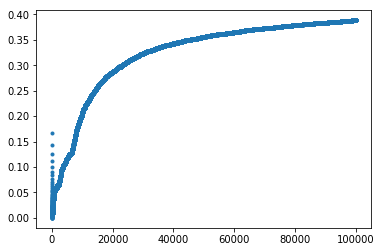

In [4]:
# Solution

import finiteStateAgents as fs


NumEpisodes = 100000
agent = fs.mcAgent(env,epsilon=1.,gamma = 0.99)
beta = .3

R_tot = []

for ep in range(NumEpisodes):
    s = env.reset()
    epsilon = (1/(1+ep))**(beta)
    agent.epsilon = epsilon
    R = []
    done = False
    while not done:
        a = agent.action(s)
        
        s_next, reward, done, info = env.step(a)
        agent.update(s,a,reward,s_next,done,info)
        s = s_next
        R.append(reward)
        if done:
                
            R_tot.append(np.sum(R))
            break
            
    if ((ep+1) % 1000) == 0:
        print(ep+1,np.sum(R_tot)/(ep+1))
            
            
            
plt.plot(np.cumsum(R_tot)/np.arange(1,NumEpisodes+1),'.')

# Question

Now design a controller that learns a model for the transition probabilities, $p(s'|s,a)$ and the rewards $r(s,a) = \mathbb{E}[R_{t+1}|S_t = s,A_t = a]$, and uses the estimates for policy iterations.

Specifically, do the following. Fix some initial policy. Then repeat the following procedure for 100,000 (or fewer if your code is very slow) steps:

* Simulate an episode with the current policy.
* Use the new data to update your model of $p(s'|s,a)$ and $r(s,a)$.
* Compute an updated policy by policy iteration.
* Modify the policy to make it $\epsilon$-greedy.

Some tips:
* For policy iteration to work properly, you need to ensure that $p(\hat s | \hat s,a)=1$ and $r(\hat s,a)=0$ for all terminal states, $\hat s$. 
* You can check that a state is terminal if it is the state returned by the `env.step` function when the episode ends normally. That is when `done` is `True` and `info['TimeLimit.truncated']` is not `True`.
* When the episode ends normally, `'TimeLimit.truncated'` will not be a key of the `info` dictionary.
* You will need to use a discount factor $0 < \gamma < 1$  to ensure tht policy evaluation is solvable.
* The matrix vector version of policy evaluation from the last will likely be more efficient than the iteration described in the book.
* You will still need to decrease $\epsilon$ as the number of episodes increases as above.
* This strategy should improve more quickly (as a function of the episode count) than the basic Monte Carlo method, at the expense of extra computation.
* There is a good chance you won't be able to get up to rewards in the 0.7 range without tuning $\epsilon$ very well or running a very large number of episodes.

In [5]:
# Make your simulation here

1000 0.251
2000 0.2895
3000 0.319
4000 0.3465
5000 0.3648
6000 0.382
7000 0.3952857142857143
8000 0.40425
9000 0.41255555555555556
10000 0.4212
11000 0.42927272727272725
12000 0.4365
13000 0.44146153846153846
14000 0.4466428571428571
15000 0.4518
16000 0.4565625
17000 0.46158823529411763
18000 0.46444444444444444
19000 0.46757894736842104
20000 0.4704
21000 0.4744285714285714
22000 0.4777272727272727
23000 0.4796521739130435
24000 0.4820833333333333
25000 0.48448
26000 0.48673076923076924
27000 0.48914814814814817
28000 0.49142857142857144
29000 0.49344827586206896
30000 0.4963666666666667
31000 0.4975806451612903
32000 0.4999375
33000 0.5016060606060606
34000 0.5026764705882353
35000 0.505
36000 0.5060277777777777
37000 0.5084864864864865
38000 0.5098421052631579
39000 0.5114358974358975
40000 0.513
41000 0.5137317073170732
42000 0.5151428571428571
43000 0.5158139534883721
44000 0.5175909090909091
45000 0.5186444444444445
46000 0.5196739130434782
47000 0.5211702127659574
48000 0.52233

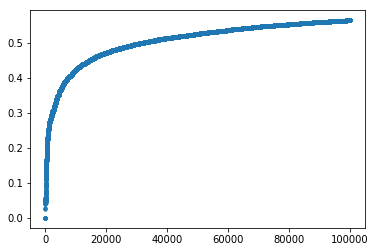

In [6]:
# Solution

import finiteStateAgents as fs


NumEpisodes = 100000
agent = fs.piAgent(env,epsilon=1.,gamma = 0.99)
beta = .3

R_tot = []

for ep in range(NumEpisodes):
    s = env.reset()
    epsilon = (1/(1+ep))**(beta)
    agent.epsilon = epsilon
    R = []
    done = False
    while not done:
        a = agent.action(s)
        
        s_next, reward, done, info = env.step(a)
        agent.update(s,a,reward,s_next,done,info)
        s = s_next
        R.append(reward)
        if done:
                
            R_tot.append(np.sum(R))
            break
            
    if ((ep+1) % 1000) == 0:
        print(ep+1,np.sum(R_tot)/(ep+1))
            
            
            
plt.plot(np.cumsum(R_tot)/np.arange(1,NumEpisodes+1),'.')